# Classify faces using Traditional Machine Learning Algorithms

> We can achieve reasonable performance on an image classification task by fitting a simple Machine Learning (ML) algorithm such as KNearestNeighbours or Random Forest Classifiers. Principal Component Analysis (PCA) can be effectively used to reduce number of features. We will evaluate classification performance by training KNNs and Random Forests on features that are computed from the raw pixels reduced by PCA. 

- toc: false
- badges: true
- comments: true
- categories: [image-analytics, KNN, random forest, PCA, classification, faces-dataset]
- image: images/facial_recognition_traditional_ml.png

### [Setup Files](https://github.com/contactmansi/facial-recoginition-traditional-machine-learning)
- face: Database of face images
- FisherFace.py: Helps compute PCA features
- Steps to setup can be found on [Github](https://github.com/contactmansi/facial-recoginition-traditional-machine-learning)

### Database

The image files have names ppppp_xx_yy.bmp, where ppppp denotes the identity of the person called person ID; xx denotes the head orientation (we can ignore that, since in this dataset all images have same head orientation); and yy denotes the lighting condition. All images have been cropped and aligned with a height, width of 160, 140 pixels respectively.


**Attention**:
- *python3.x is preferred*
- *We do not require a GPU, CPU is enough.*

**After setting up virtual environment import libraries and FiesherFace.py**

In [1]:
import FisherFace
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

***Read faces from the database path***

In [2]:
## Get the data
database_path = "./face/"
faces, ids = FisherFace.read_faces(database_path)

## Check the data shapes
## Note: `faces` HAS THE WHOLE DATABASE, NOT SPLIT INTO TRAIN & TEST
print(faces.shape, ids.shape)

(22400, 240) (240,)


### Task 1: Let's answer the following questions to understand the faces data


**Question 1** How many instances, and how many classes in this dataset?

In [3]:
unique_ids, counts = np.unique(ids, return_counts=True)
print(f"Total classes in faces dataset: {len(unique_ids)}")
print(f"Total instances: {len(ids)}")
print(f"Instances for each class label:\n{unique_ids}\n{counts}")


Total classes in faces dataset: 10
Total instances: 240
Instances for each class label:
[0 1 2 3 4 5 6 7 8 9]
[24 24 24 24 24 24 24 24 24 24]


**Question 2** What is the shape of each image instance?

In [4]:

# imports
import cv2
import os
# list all images in a list from face folder
images = os.listdir(database_path)
# create a dictionary to store dimentions for each image
dimensions = dict()
# Loop to store dimensions of each image in dimension dictionary
for image in images:
    image_path = os.path.join(database_path,image)
    image = cv2.imread(image_path)
    dimensions[image_path] = image.shape
# Print unique values for dimensions from different images
print(f"Shape in (height, width, number of channels) of each image is: {set(dimensions.values())}")
print("Observe that single value from dimensions dictionary means that all images have the same dimension as above.")

Shape in (height, width, number of channels) of each image is: {(160, 140, 3)}
Observe that single value from dimensions dictionary means that all images have the same dimension as above.


**Question 3**  Does this dataset have balanced classes?

In [5]:
print(f"Instances for each class label:\n{unique_ids}\n{counts}")
print("Yes, this dataset has balanced classes because the number of images for each person/class label is 24")

Instances for each class label:
[0 1 2 3 4 5 6 7 8 9]
[24 24 24 24 24 24 24 24 24 24]
Yes, this dataset has balanced classes because the number of images for each person/class label is 24


### Task 2: Visualize the Data
- For each of the persons, visualize 2 face images with matplotlib subplot grid.

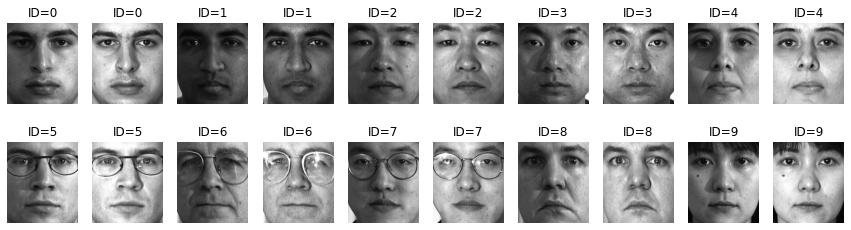

In [6]:
# Creating an array 'img_arr' consisting a list of images to be printed
# I have chosen to print 5th and 10th image out of 24 images for each of the 10 people in dataset
img_arr = []

for image in images:
    # Choose 5th and 10th image for each person
    if '_04.bmp' in image or '_09.bmp' in image:
        img_arr.append(image)
img_arr.sort()

n_row, n_col = 2, 10
_, axs = plt.subplots(n_row, n_col, figsize=(15, 4))
axs = axs.flatten()
for img, ax in zip(img_arr, axs):
    image_path = './face/'+img
    image = cv2.imread(image_path)
    ax.axis("off")
    ax.imshow(image)
    label = img.split('_')[0][-1]
    ax.set_title(f'ID={label}', color='black')
plt.show()

### Task 3: Randomly split your data into Train, Test set

There are 24 images for each person. 
- Randomly split these into two sets of equal size. That is, your train and test sets will have 12 images for each per person.
- Read `train` and `test` faces using `FisherFace.read_faces(path)`.

In [7]:
from sklearn.model_selection import train_test_split
import shutil
import pandas as pd

def copy_files(source, destination, files):
    # source: https://www.geeksforgeeks.org/python-shutil-copy-method/
    try:
        for file in files:
            shutil.copy(os.path.join(source, file), destination)
        print("Images copied succesfully")
    # If source and destination are same
    except shutil.SameFileError:
        print("Source and destination represents the same file.")
    # For other errors
    except:
        print("Error occurred while copying file.")
    
def get_train_test_faces(database_path, train_ratio=0.8):
    """
    Split data and return train, test and validation splits
    INPUT: train_ratio : Percentage of training data required in total, test_ratio = 1.00 - train_ratio
    RETURN: traintrain_faces, train_ids, test_faces, test_ids
    HINT: first list the images in the database, 
          group into each classes, 
          then randomly choose from each classes according to train_ratio,
          copy and store those face images in two folders: 'train' and 'test',
          use `FisherFace.read_faces(path)` for reading face
          [This hint is just a suggestion, you can use your own technique]
    """
    ## TODO: Your code here
    
    # first list the images in the database
    images = os.listdir(database_path)
    
    # randomly choose from each class using stratify on images_df and according to train_ratio and 
    train, test = train_test_split(images, test_size=(1-train_ratio), stratify=ids, random_state=42)
    
    # create test and train destination folders to copy files
    train_path = './train/'
    test_path = './test/'
    if not os.path.exists(train_path):
        os.mkdir(train_path)
    if not os.path.exists(test_path):
        os.mkdir(test_path)
    
    # copy and store face images using user-defined utility function copy_files()
    copy_files(database_path, train_path, train)
    copy_files(database_path, test_path, test)
    
    # use `FisherFace.read_faces(path)` for reading face
    train_faces, train_ids = FisherFace.read_faces(train_path)
    test_faces, test_ids = FisherFace.read_faces(test_path)
    
    return train_faces, train_ids, test_faces, test_ids

In [8]:
train_faces, train_ids, test_faces, test_ids = get_train_test_faces(database_path=database_path, train_ratio=0.5)
print(train_faces.shape, train_ids.shape)
print(test_faces.shape, test_ids.shape)

Images copied succesfully
Images copied succesfully
(22400, 120) (120,)
(22400, 120) (120,)


### Compute PCA

In [9]:
def train_PCA(data, D):
    """
    'data': self explanatory
    'D': Projection dimension, we retain only top 'D' eigenfaces
    
    RETURN
    'W': PCA projection matrix
    'LL': eigenvalues
    'm': global mean vector
    """
    W, LL, m = FisherFace.myPCA(data)
    W = W[:,:D]
    return W, LL, m

def get_face_features(data, W, m):
    r, c = data.shape
    mean_faces = data - np.tile(m, (c, 1)).T
    features = np.dot(W.T, mean_faces)
    return features

### Task 4: Compute PCA feature from face images

**Compute PCA feature from face images.**

Use the code in the block above to:
1. Train PCA Projection Matrix from the `train_faces` using the function in the block above: `train_PCA(data, D)`.
2. Get the `train` and `test` face-features using the function `get_face_features(data, W, m)`.

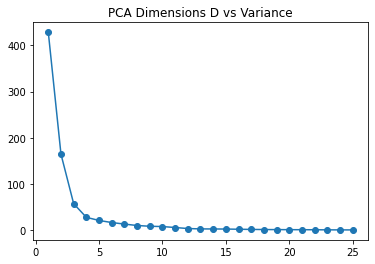

     D    variance
0    1  428.521854
1    2  164.701332
2    3   57.638644
3    4   28.068231
4    5   21.346938
5    6   16.820264
6    7   13.485714
7    8   10.392261
8    9    8.792255
9   10    8.114008
10  11    6.069622
11  12    3.831245
12  13    3.061438
13  14    2.917512
14  15    2.729116
15  16    2.311011
16  17    1.938575
17  18    1.670512
18  19    1.516909
19  20    1.383781
20  21    1.295904
21  22    1.201229
22  23    1.021337
23  24    0.899807
24  25    0.855575


In [10]:
# Train PCA projection matrix, use the projection matrix for computing features
# randomly observing 25 dimensions to pick optimum n_components for PCA dimensions
D=25
PCA_proj_matrix, Eigenvalues, g_mean_vector = train_PCA(train_faces, D)
train_features = get_face_features(train_faces, PCA_proj_matrix, g_mean_vector)

# estimating the apt number of projection dimensions D
pca_variance = pd.DataFrame ({"D":range(1, D+1), "variance":np.round(np.sum(train_features**2, axis=1),3)/10**7})
plt.plot(pca_variance.D, pca_variance.variance, linestyle='-', marker='o')
plt.title("PCA Dimensions D vs Variance")
plt.show()
print(pca_variance)

##### D=12 seems to be apt dimension because the change is variance is limited on increasing dimension beyond 12

In [11]:
# Train PCA projection matrix, use the projection matrix for computing features
# D=12 seems to be apt dimension because the change is variance is limited on increasing dimension beyond 12
D=12
PCA_proj_matrix, Eigenvalues, mean_vector = train_PCA(train_faces, D)

# Compute the train features
# TODO: Your code here
train_features = get_face_features(train_faces, PCA_proj_matrix, g_mean_vector)

# Compute the test features
# TODO: Your code here
test_features = get_face_features(test_faces, PCA_proj_matrix, g_mean_vector)
display(
    train_features.shape,
    test_features.shape
)

(12, 120)

(12, 120)

### Task 5: Train the sklearn KNN to classify the images (4 marks)
- Use scikit learn to train kNN classifiers with this training set by varying the value for `k` (k = 3, 5, 7). 
- Evaluate the classifier with the test dataset by computing the accuracy for each classifier.

In [12]:
# Predict with KNN classifier
def kNearestNeighbors(k, train_features, train_labels, test_features, test_labels):
    """
    'k': number of neighbors
    'train_features': train face features
    'train_labels': train data labels
    'test_features': test face features
    'test_labels': test data labels

    RETURN
    'accuracy': floating point value, accuracy of the model on `test_features`
    """
    
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs=-1).fit(train_features.T, train_labels)
    y_pred = knn.predict(test_features.T)
    return accuracy_score(test_labels, y_pred)

In [13]:
# Evaluate accuracy for each kNN models. Print the accuracy values.
k_list = [3, 5, 7]  # fill up the list to test more neighbours
acc_list_knn = []
for k in k_list:
    # TODO: Your code here
    acc = kNearestNeighbors(k, train_features, train_ids, test_features, test_ids)
    acc_list_knn.append(acc)
    print(f'{k=}, {acc=: .2f}')

k=3, acc= 0.85
k=5, acc= 0.78
k=7, acc= 0.73


### Task 6: Visualize your results from KNN

**Question 1**: Plot `k` value vs `accuracy`

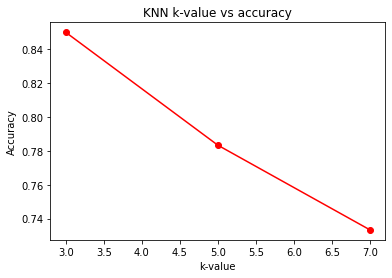

In [14]:
# TODO: Your code here
plt.plot(k_list, acc_list_knn, linestyle='-', marker='o', color='red',label="k vs accuracy")
plt.title("KNN k-value vs accuracy")
plt.xlabel("k-value")
plt.ylabel("Accuracy")
plt.show()

**Question 2**: Calculate the confusion matrix for `k = 5`.

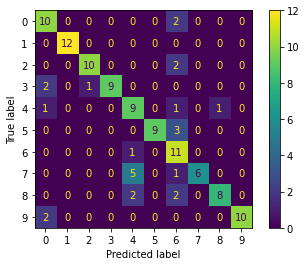

In [15]:
# TODO: Your code here
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
k = 5
knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1).fit(train_features.T, train_ids)
cm = confusion_matrix(test_ids, knn.predict(test_features.T))
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_disp.plot()
plt.show()

**Question 3**: Find the 5 nearest neighbors for one of the faces from the test set and visualize them.

*You can use any of the kNN models, and choose any of the faces for this question*.

Actual Test ID of first data point is 9.
IDs of Neighbours selected by KNN from training data are: [9 9 9 3 3]


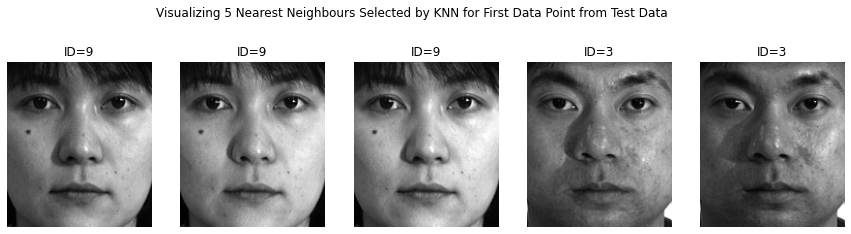

In [16]:
# Find the 5 nearest neighbors for the first data of the test set and visualize them 

neighbors = knn.kneighbors(test_features.T[0].reshape(1,-1))[1].reshape(-1)
neighbors_features = train_faces[:, neighbors]
neighbors_id = train_ids[neighbors]
print(f"Actual Test ID of first data point is {test_ids[0]}.\nIDs of Neighbours selected by KNN from training data are: {neighbors_id}")

n_row, n_col = 1, 5
fig, axs = plt.subplots(n_row, n_col, figsize=(15, 4))
axs = axs.flatten()
fig.suptitle(f"Visualizing {k} Nearest Neighbours Selected by KNN for First Data Point from Test Data")
for i, ax in enumerate(axs):
    ax.axis("off")
    ax.imshow(neighbors_features[:,i].reshape(160,140), cmap=plt.cm.gray)
    ax.set_title(f'ID={str(neighbors_id[i])}')
plt.show()

### Task 7: Train the sklearn Random Forest to classify the images
- Use scikit learn to train a **Random Forest classifier** for the same training set. 
- Change different values for the parameter `n_estimators` in the Random Forest.

In [17]:
def RandomForest(n_estimators, train_features, train_labels, test_features, test_labels):
    """
    'n_estimators': number of estimators
    'train_features': train face features
    'train_labels': train data labels
    'test_features': self explanatory
    'test_labels': test data labels

    RETURN
    'accuracy': floating point value, accuracy of the model on `test_features`
    """
    
    # TODO: Your code here
    random_forest = RandomForestClassifier(n_estimators = n_estimators, n_jobs=-1).fit(train_features.T, train_labels)
    y_pred = random_forest.predict(test_features.T)
    return accuracy_score(test_labels, y_pred)


In [18]:
# Changing different values for the parameter `n_estimators` in the Random Forest. Print the accuracy values.
n_est_list = [20, 40, 60, 80, 100, 120]  # fill up the list
acc_list_rf = []
for n_est in n_est_list:
    # TODO: Your code here
    accuracy = RandomForest(n_est, train_features, train_ids, test_features, test_ids)
    acc_list_rf.append(accuracy)
    print(f'{n_est=}, {accuracy=: .2f}')
    

n_est=20, accuracy= 1.00
n_est=40, accuracy= 1.00
n_est=60, accuracy= 1.00
n_est=80, accuracy= 1.00
n_est=100, accuracy= 1.00
n_est=120, accuracy= 1.00


### Task 8: Visualize your results from Random Forest

**Question 1**: Visualize the change in accuracy when `n_estimators` is changed as above. 

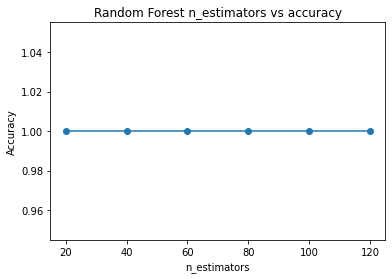

In [19]:
plt.plot(n_est_list, acc_list_rf, linestyle='-', marker='o')
plt.title("Random Forest n_estimators vs accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

**Question 2**: Calculate the confusion matrix for `n_estimators = 100`.

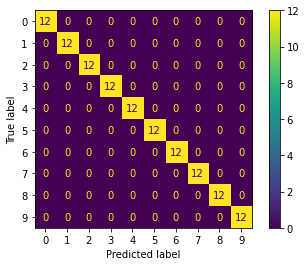

In [20]:
n_estimators = 100
random_forest = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1).fit(train_features.T, train_ids)
cm = confusion_matrix(test_ids, random_forest.predict(test_features.T))
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_disp.plot()
plt.show()

**Question 3**: Visualize 10 test face images randomly along with their predicted values.

Randomly selected 10 test images Actual labels : [2 5 4 4 8 3 5 8 4 3]
Random Forest Trained Model Prediction labels :  [2 5 4 4 8 3 5 8 4 3]


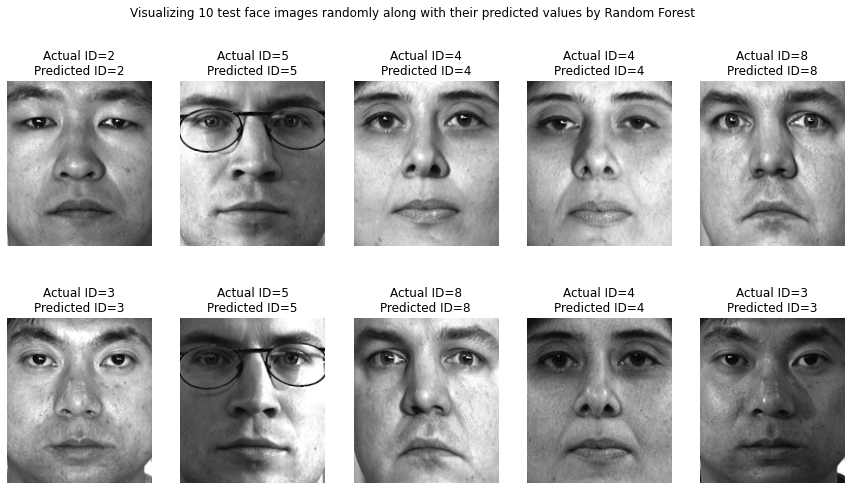

In [21]:
import random
random.seed(8968)
# generating 10 random labels from [0,120) 
random_test_idx = random.sample(range(120), 10)
# getting actual labels/IDs of these randomly selected 10 test face images from test_ids
random_test_labels = test_ids[random_test_idx]
# getting features of these randomly selected 10 test face images from test_faces
random_test_features = test_faces[:, random_test_idx]
# getting prediction labels/IDs for random images using random forest trained model on PCA reduced test_features
predicted_labels = random_forest.predict(test_features.T[random_test_idx])

print("Randomly selected 10 test images Actual labels :", random_test_labels)
print("Random Forest Trained Model Prediction labels : ", predicted_labels)

n_row, n_col = 2,5
fig, axs = plt.subplots(n_row, n_col, figsize=(15, 8))
fig.suptitle(f"Visualizing 10 test face images randomly along with their predicted values by Random Forest")
axs = axs.flatten()
for i, ax in enumerate(axs):
    ax.axis("off")
    ax.imshow(random_test_features[:, i].reshape(160,140), cmap=plt.cm.gray)
    ax.set_title(f'Actual ID={random_test_labels[i]}\nPredicted ID={predicted_labels[i]}')

plt.show()